## Import librarys

In [1]:
import path_manager as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Covid-19 
***

In [2]:
# Loads the Covid-19 dataset
df_covid  = pd.read_csv(pm.covid_data_path)

In [3]:
df_covid

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,...,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,05/23/2024,217,167,27,1,228,380,25,0,43,...,7,13,1,0,10,10,20,2,0,61030
1546,05/24/2024,235,164,27,0,231,387,25,0,57,...,8,7,3,0,10,10,20,2,0,61030
1547,05/25/2024,145,114,26,0,228,385,25,0,27,...,8,11,1,0,10,11,21,2,0,61030
1548,05/26/2024,160,134,7,0,232,390,23,0,35,...,7,2,1,0,9,10,20,2,0,61030


## Data Covid-19 modeling 
***

In [4]:
# Check for any missing values in the DataFrame
missing_data = df_covid.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 date_of_interest                   0
CASE_COUNT                         0
PROBABLE_CASE_COUNT                0
HOSPITALIZED_COUNT                 0
DEATH_COUNT                        0
CASE_COUNT_7DAY_AVG                0
ALL_CASE_COUNT_7DAY_AVG            0
HOSP_COUNT_7DAY_AVG                0
DEATH_COUNT_7DAY_AVG               0
BX_CASE_COUNT                      0
BX_PROBABLE_CASE_COUNT             0
BX_HOSPITALIZED_COUNT              0
BX_DEATH_COUNT                     0
BX_CASE_COUNT_7DAY_AVG             0
BX_PROBABLE_CASE_COUNT_7DAY_AVG    0
BX_ALL_CASE_COUNT_7DAY_AVG         0
BX_HOSPITALIZED_COUNT_7DAY_AVG     0
BX_DEATH_COUNT_7DAY_AVG            0
BK_CASE_COUNT                      0
BK_PROBABLE_CASE_COUNT             0
BK_HOSPITALIZED_COUNT              0
BK_DEATH_COUNT                     0
BK_CASE_COUNT_7DAY_AVG             0
BK_PROBABLE_CASE_COUNT_7DAY_AVG    0
BK_ALL_CASE_COUNT_7DAY_AVG         0
BK_HOSPITALIZED_COUNT_7DAY_AVG     0
BK_DEA

In [5]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date_of_interest                 1550 non-null   object
 1   CASE_COUNT                       1550 non-null   int64 
 2   PROBABLE_CASE_COUNT              1550 non-null   int64 
 3   HOSPITALIZED_COUNT               1550 non-null   int64 
 4   DEATH_COUNT                      1550 non-null   int64 
 5   CASE_COUNT_7DAY_AVG              1550 non-null   int64 
 6   ALL_CASE_COUNT_7DAY_AVG          1550 non-null   int64 
 7   HOSP_COUNT_7DAY_AVG              1550 non-null   int64 
 8   DEATH_COUNT_7DAY_AVG             1550 non-null   int64 
 9   BX_CASE_COUNT                    1550 non-null   int64 
 10  BX_PROBABLE_CASE_COUNT           1550 non-null   int64 
 11  BX_HOSPITALIZED_COUNT            1550 non-null   int64 
 12  BX_DEATH_COUNT                   1

In [6]:
# Convert date to datetime format
df_covid['date_of_interest'] = pd.to_datetime(df_covid['date_of_interest'])

In [7]:
print(df_covid['date_of_interest'].dtypes)

datetime64[ns]


In [8]:
# Selection of indicators for analysis
columns_covid = {
    'date_of_interest': 'Data',
    'CASE_COUNT': 'Number of cases',
    'PROBABLE_CASE_COUNT': 'Probable cases',
    'HOSPITALIZED_COUNT': 'Hospitalized',
    'DEATH_COUNT': 'Number of deaths',
}

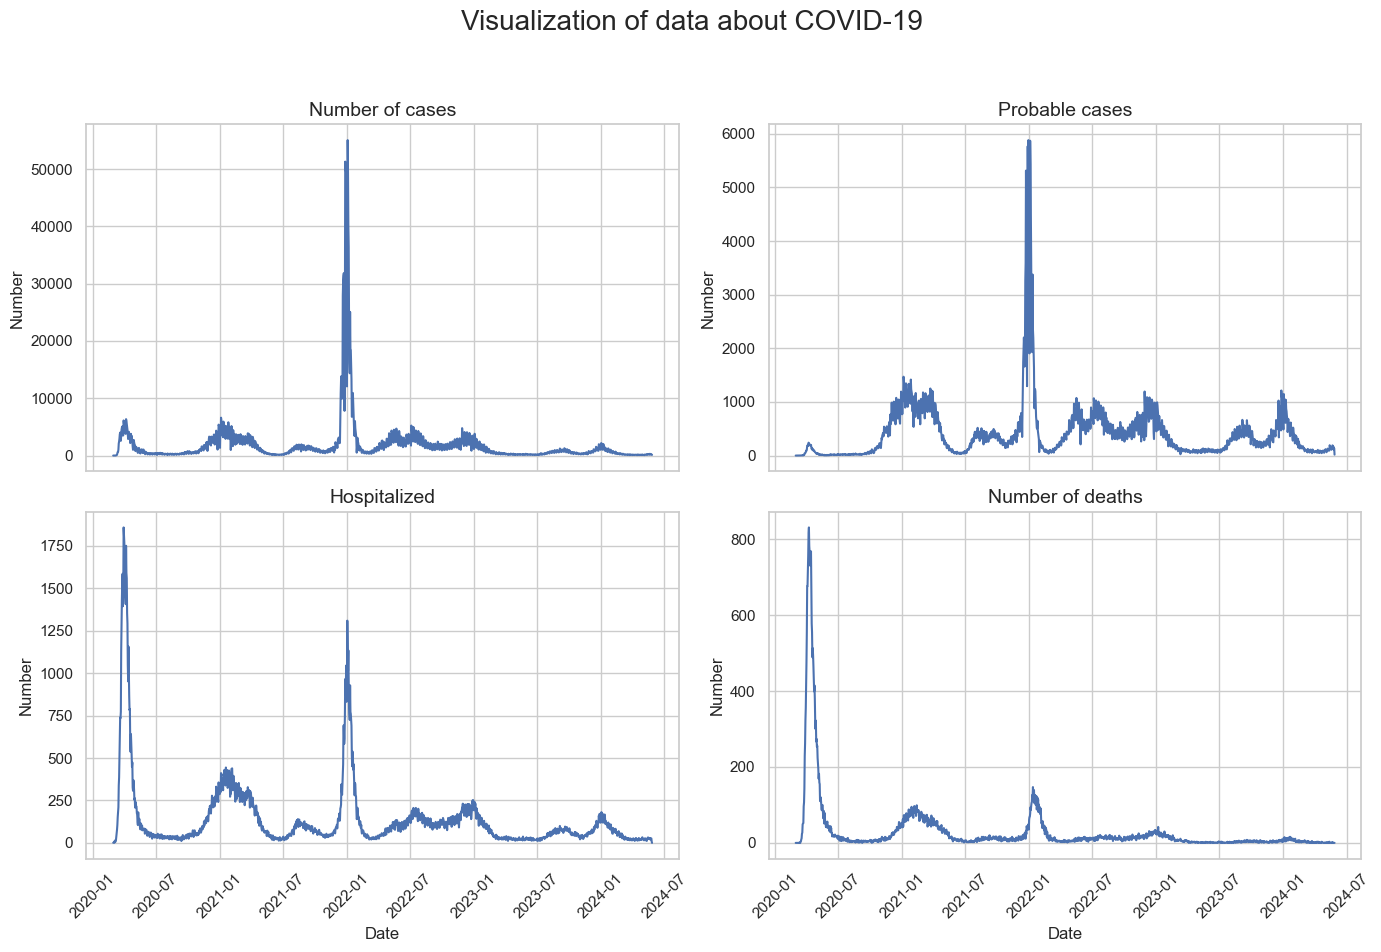

In [9]:
# Set style
sns.set_theme(style='whitegrid')

# Visualize data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)
fig.suptitle('Visualization of data about COVID-19', fontsize=20)

for i, (original_column, new_column) in enumerate(columns_covid.items()):
    if original_column == 'date_of_interest':
        continue
    ax = axes[(i-1)//2, (i-1)%2]  # Skip first row as date
    sns.lineplot(x=df_covid['date_of_interest'], y=df_covid[original_column], ax=ax)
    ax.set_title(new_column, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Number', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Adjustment of the lower axis
for ax in axes[-1, :]:
    ax.set_xlabel('Date', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Data Taxi modeling
***

In [10]:
# Loads the Taxi dataset example
df_taxi_yellow  = pd.read_csv(pm.taxi_yellow_data_example)
df_taxi_green  = pd.read_csv(pm.taxi_green_data_example)
df_taxi_fhv  = pd.read_csv(pm.taxi_fhv_example)

In [11]:
df_taxi_yellow 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2015-01-01 00:11:33,2015-01-01 00:16:48,1,1.0,1,N,41,166,1,5.7,0.5,0.5,1.40,0.0,0.0,8.40,NaN,NaN
1,1,2015-01-01 00:18:24,2015-01-01 00:24:20,1,0.9,1,N,166,238,3,6.0,0.5,0.5,0.00,0.0,0.0,7.30,NaN,NaN
2,1,2015-01-01 00:26:19,2015-01-01 00:41:06,1,3.5,1,N,238,162,1,13.2,0.5,0.5,2.90,0.0,0.0,17.40,NaN,NaN
3,1,2015-01-01 00:45:26,2015-01-01 00:53:20,1,2.1,1,N,162,263,1,8.2,0.5,0.5,2.37,0.0,0.0,11.87,NaN,NaN
4,1,2015-01-01 00:59:21,2015-01-01 01:05:24,1,1.0,1,N,236,141,3,6.0,0.5,0.5,0.00,0.0,0.0,7.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12741030,1,2015-01-31 23:21:42,2015-01-31 23:31:00,1,1.6,1,N,90,249,1,8.0,0.5,0.5,2.32,0.0,0.3,11.62,NaN,NaN
12741031,1,2015-01-31 23:42:43,2015-01-31 23:49:32,1,0.6,1,N,90,68,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76,NaN,NaN
12741032,1,2015-01-31 23:55:16,2015-02-01 00:16:45,1,3.0,1,N,68,148,1,15.0,0.5,0.5,4.07,0.0,0.3,20.37,NaN,NaN
12741033,1,2015-01-31 23:20:53,2015-02-01 00:07:35,1,6.9,1,N,189,237,1,32.5,0.5,0.5,6.00,0.0,0.3,39.80,NaN,NaN


In [12]:
df_taxi_yellow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741035 entries, 0 to 12741034
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(10), int64(6), object(3)
memory usage: 1.8+ GB


In [13]:
df_taxi_green

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2015-01-01 00:31:10,2015-01-01 00:50:41,N,1,255,234,1,5.88,20.0,0.5,0.5,4.1,0.0,NaN,0.3,25.4,1,1.0,NaN
1,2,2015-01-01 00:01:05,2015-01-01 00:03:30,N,1,75,74,1,0.89,4.5,0.5,0.5,0.0,0.0,NaN,0.3,5.8,2,1.0,NaN
2,2,2015-01-01 00:09:01,2015-01-01 00:33:26,N,1,43,186,1,5.71,22.0,0.5,0.5,0.0,0.0,NaN,0.3,23.3,1,1.0,NaN
3,2,2015-01-01 00:17:34,2015-01-01 00:27:07,N,1,80,36,1,1.89,8.5,0.5,0.5,0.0,0.0,NaN,0.3,9.8,2,1.0,NaN
4,2,2015-01-01 00:32:38,2015-01-01 00:40:32,N,1,37,17,1,1.07,6.5,0.5,0.5,0.0,0.0,NaN,0.3,7.8,2,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508488,2,2015-01-31 23:50:32,2015-02-01 00:05:43,N,1,75,230,1,3.91,14.5,0.5,0.5,0.0,0.0,NaN,0.3,15.8,2,1.0,NaN
1508489,1,2015-01-31 23:20:01,2015-01-31 23:34:29,N,1,80,112,1,2.00,11.0,0.5,0.5,1.0,0.0,NaN,0.3,13.3,1,1.0,NaN
1508490,1,2015-01-31 23:52:30,2015-02-01 00:18:53,N,1,112,79,1,4.70,20.5,0.5,0.5,5.0,0.0,NaN,0.3,26.8,1,1.0,NaN
1508491,2,2015-01-31 23:47:51,2015-01-31 23:59:03,N,1,74,250,1,5.98,18.0,0.5,0.5,0.0,0.0,NaN,0.3,19.3,2,1.0,NaN


In [14]:
df_taxi_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508493 entries, 0 to 1508492
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1508493 non-null  int64  
 1   lpep_pickup_datetime   1508493 non-null  object 
 2   lpep_dropoff_datetime  1508493 non-null  object 
 3   store_and_fwd_flag     1508493 non-null  object 
 4   RatecodeID             1508493 non-null  int64  
 5   PULocationID           1508493 non-null  int64  
 6   DOLocationID           1508493 non-null  int64  
 7   passenger_count        1508493 non-null  int64  
 8   trip_distance          1508493 non-null  float64
 9   fare_amount            1508493 non-null  float64
 10  extra                  1508493 non-null  float64
 11  mta_tax                1508493 non-null  float64
 12  tip_amount             1508493 non-null  float64
 13  tolls_amount           1508493 non-null  float64
 14  ehail_fee         

In [15]:
df_taxi_fhv

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2023-12-01 00:15:00,2023-12-01 00:57:00,NaN,NaN,NaN,B00009
1,B00009,2023-12-01 00:20:00,2023-12-01 00:59:00,NaN,NaN,NaN,B00009
2,B00013,2023-12-01 00:27:25,2023-12-01 00:46:00,NaN,NaN,NaN,B00053
3,B00013,2023-12-01 00:00:00,2023-12-01 00:32:00,NaN,NaN,NaN,B00381
4,B00013,2023-12-01 00:45:53,2023-12-01 01:33:00,NaN,NaN,NaN,B00013
...,...,...,...,...,...,...,...
1376743,B03505,2023-12-31 23:28:48,2023-12-31 23:31:58,NaN,198.0,NaN,B03505
1376744,B03505,2023-12-31 23:02:27,2023-12-31 23:21:31,NaN,82.0,NaN,B03505
1376745,B03505,2023-12-31 23:36:24,2024-01-01 00:00:25,NaN,251.0,NaN,B03505
1376746,B03529,2023-12-31 23:15:42,2023-12-31 23:26:29,NaN,61.0,NaN,B03404


In [16]:
df_taxi_fhv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376748 entries, 0 to 1376747
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   dispatching_base_num    1376748 non-null  object 
 1   pickup_datetime         1376748 non-null  object 
 2   dropOff_datetime        1376748 non-null  object 
 3   PUlocationID            239254 non-null   float64
 4   DOlocationID            1166106 non-null  float64
 5   SR_Flag                 0 non-null        float64
 6   Affiliated_base_number  1362044 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.5+ MB


## Data analysis and extraction
***
The set of data taxis is divided into three categories of different types of taxis and has a large volume and consists of 324 files and occupies approximately 122Gb of memory on the device. In order not to use cloud storage and not have additional costs for renting server capacities, the decision was made to calculate data from a local directory on the hard drive, and then store these already calculated data in an Excel table for analysis.

## Preliminary analysis for data outliers
***
The first step is to iterate the sample based on the unique data from the distance indicator, which are present in the data sets for the Yellow and Green taxis. It is obvious that the traveled distance cannot be negative.

In [17]:
# Define pass to folder
data_dir = pm.data_taxi_dir

In [18]:
# Get list all .csv files start with file group name
file_list_green = [f for f in os.listdir(data_dir) if f.startswith('green_tripdata_') and f.endswith('.csv')]
file_list_yellow = [f for f in os.listdir(data_dir) if f.startswith('yellow_tripdata_') and f.endswith('.csv')]
file_list_fhv = [f for f in os.listdir(data_dir) if f.startswith('fhv_tripdata_') and f.endswith('.csv')]

In [19]:
# Count unique indicator in collumn
def get_unique_trip_distances(file_list, column_name):
    """
    Gets unique values from the `trip_distance` column from all files in the specified directory.

    Parameters:
    directory (str): The directory that contains the files.
    prefix (str): Prefix of filenames to process.
    column_name (str): The name of the column from which you want to retrieve unique values.

    Returns:
    list: List of unique value from the 'column_name' column.
    """

    # Initialize an empty set to store unique values trip_distance
    unique_trip_distances = set()

    # Go through each file and select unique values ​​from the column 'trip_distance'
    for file in file_list:
        file_path = os.path.join(pm.data_taxi_dir, file)
        df = pd.read_csv(file_path)
        unique_trip_distances.update(df[column_name].unique())

    # Convert a set of unique values ​​to a list and return it
    return list(unique_trip_distances)

In [20]:
# Call unique trip distances function
column_name = 'trip_distance'
unique_trip_distances_green = get_unique_trip_distances(file_list_green, column_name)
unique_trip_distances_yellow = get_unique_trip_distances(file_list_yellow, column_name)

C:\Users\Serhii\AppData\Local\Temp\ipykernel_22236\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_22236\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_22236\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_22236\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Serhii\AppData\Local\Temp\ipykernel_22236\2292999370.py:21: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Us

In [21]:
# Show result get_unique_trip_distances
unique_trip_distances_green.sort()
print(unique_trip_distances_green)
unique_trip_distances_yellow.sort()
print(unique_trip_distances_yellow)

[-20329.08, -16183.31, -13844.68, -9436.33, -4311.35, -40.25, -33.69, -33.29, -33.23, -32.23, -31.45, -31.21, -30.88, -30.8, -30.74, -30.47, -30.2, -30.05, -30.04, -29.98, -29.97, -29.96, -29.94, -29.71, -29.62, -29.61, -29.55, -29.34, -29.31, -29.29, -29.28, -29.21, -29.17, -29.08, -29.05, -29.03, -28.99, -28.89, -28.87, -28.78, -28.66, -28.65, -28.5, -28.45, -28.42, -28.35, -28.24, -28.17, -28.16, -28.15, -28.12, -28.1, -28.09, -27.98, -27.91, -27.9, -27.89, -27.86, -27.83, -27.82, -27.63, -27.62, -27.58, -27.54, -27.49, -27.43, -27.39, -27.36, -27.34, -27.28, -27.27, -27.25, -27.24, -27.23, -27.2, -27.18, -27.07, -26.93, -26.87, -26.83, -26.81, -26.75, -26.73, -26.71, -26.66, -26.62, -26.58, -26.53, -26.51, -26.42, -26.37, -26.36, -26.34, -26.33, -26.31, -26.28, -26.26, -26.21, -26.19, -26.18, -26.15, -26.09, -26.08, -26.07, -26.02, -25.99, -25.96, -25.95, -25.88, -25.87, -25.86, -25.63, -25.61, -25.58, -25.45, -25.43, -25.35, -25.33, -25.32, -25.3, -25.28, -25.27, -25.26, -25.21, -

## Determine statistical outliers
***

Based on the results obtained from the function **get_unique_trip_distances**, it can be concluded that the data may contain a large number of **outliers**. For a more detailed analysis, you need to calculate the standard deviation. Standard deviation measures the spread of values relative to the mean.

**Large standard deviation** means that the data is scattered far from the mean.

**Small standard deviation** means that the values are more grouped around the mean.

Calculating the standard deviation will help you assess the variability of the data and determine how much it deviates from the mean. This can be useful for identifying outliers and making further data processing decisions.

In [22]:
# Function to determine statistical outliers in a column
def detect_outliers(df, column_name):

    """
    Calculate the mean and standard deviation (std) for column column_name in DataFrame df.
    mean(): function calculates the average value of all values in the specified column.
    std(): function calculates the standard deviation of all values in the specified column.
    
    Standard deviation measures the variation of values relative to the mean. A large standard deviation 
    means that the data is scattered far from the mean, while a small standard deviation means that the values 
    are more grouped around the mean.
    """
    # Calculation of statistical indicators
    mean = df[column_name].mean()
    std = df[column_name].std()

    """
    Define the limits for outliers using the rule of three standard deviations 
    (also known as the rule of thumb or the rule of three sigma).
    lower_bound (lower limit) is calculated as the mean minus three standard deviations.
    upper_bound (upper limit) is calculated as the mean plus three standard deviations.
    Under this rule, if the data has a normal distribution (i.e., a Gaussian distribution), 
    approximately 99.7% of the data will be within three standard deviations from the mean. 
    This means that values that fall outside these boundaries can be considered outliers.
    """
    # Determination of limits for emissions (3 standard deviations from the mean)
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Search for outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    return outliers

In [23]:
# Function iterate over each file and search for outliers
def search_outliers(file_list, date_name_column):
    date_column = date_name_column(file_list)
    all_outliers = pd.DataFrame()
    for file in file_list:
        file_path = os.path.join(data_dir, file)
        df = pd.read_csv(file_path)
        outliers = detect_outliers(df, date_column)
        all_outliers = pd.concat([all_outliers, outliers], ignore_index=True)

    # Extract name collunm from list
    first_element = file_list[0]
    parts = first_element.split('_')
    if len(parts) > 2:
        result = '_'.join(parts[:2])